In [1]:
# GHOST - Advection Test (1D)

import sys  
import numpy as np
import modepy as mp
sys.path.insert(0, '../src')
from Mesh import Mesh1D
from Discretization import SpatialDiscretization
from Solver import Solver


# discretization order
p = 4

# mapping degree
p_geo = p

# volume collocation degree
p_omega = 2*p

# set up periodic mesh
mesh = Mesh1D("mesh1d", 0.0, 1.0, 4)
left = [1.0, 0.0]
right = [1.0, 1.0]
mesh.add_bc_on_hyperplanes([left,right],[1,2])
mesh.make_periodic([1,2])

mesh.map_mesh(f_map=Mesh1D.grid_transformation(warp_factor=0.2),
              p_geo=p_geo)

# solver parameters
params1 = {"project_title": "adv_test_1d",
         "problem": "constant_advection",
         "initial_condition": "sine",
         "wavelength": np.array([1.0]),
         "wave_speed": np.ones(1),
         "upwind_parameter": 1.0,
         "integration_type": "collocation",
         "solution_degree": p,
         "volume_collocation_degree": p,
         "form": "strong",
         "solution_representation": "modal",
         "time_integrator": "rk44",
         "final_time": 1.0,
         "time_step_scale": 0.1}

# set up solver
solver1 = Solver(params1,mesh)

# solver parameters
params2 = {"project_title": "adv_test_1d",
         "problem": "constant_advection",
         "initial_condition": "sine",
         "wavelength": np.array([1.0]),
         "wave_speed": np.ones(1),
         "upwind_parameter": 1.0,
         "integration_type": "collocation",
         "solution_degree": p,
         "volume_collocation_degree": 2*p,
         "form": "strong",
         "solution_representation": "modal",
         "time_integrator": "rk44",
         "final_time": 1.0,
         "time_step_scale": 0.1}

# set up solver
solver2 = Solver(params2,mesh)

In [2]:
uhat_0 = solver1.project_function(solver1.u_0)

In [3]:
solver1.R(uhat_0,0.0)

[array([[-2.09767767,  5.13570365,  0.50108951, -0.40575322, -0.00955731]]),
 array([[ 7.09256476, -1.43886853, -1.03512634,  0.1717008 ,  0.01265199]]),
 array([[-2.84665981, -2.81208495,  0.35871374,  0.01719736,  0.0031313 ]]),
 array([[-8.28527400e+00, -5.47367318e-01,  1.73825556e-01,
         -1.84615431e-02, -5.96225164e-03]])]

In [4]:
solver2.R(uhat_0,0.0)

[array([[-2.09767659,  5.13573563,  0.50120216, -0.40160406, -0.00943515]]),
 array([[ 7.09256364, -1.43889096, -1.03534318,  0.16861434,  0.0123831 ]]),
 array([[-2.84665826, -2.81207382,  0.35876064,  0.01720092,  0.00314063]]),
 array([[-8.28527298e+00, -5.47399823e-01,  1.73650648e-01,
         -1.81298318e-02, -5.96480579e-03]])]

In [5]:
solver1.discretization.P

[array([[ 7.07106781e-02,  3.84980359e-01,  5.02831489e-01,
          3.84980359e-01,  7.07106781e-02],
        [-1.22474487e-01, -4.36526695e-01, -1.49204180e-17,
          4.36526695e-01,  1.22474487e-01],
        [ 1.58113883e-01,  1.22977465e-01, -5.62182695e-01,
          1.22977465e-01,  1.58113883e-01],
        [-1.87082869e-01,  2.85773803e-01, -8.00389101e-18,
         -2.85773803e-01,  1.87082869e-01],
        [ 9.42809042e-02, -2.19988776e-01,  2.51415744e-01,
         -2.19988776e-01,  9.42809042e-02]])]

In [6]:
solver2.discretization.P

[array([[ 1.96418550e-02,  1.17022892e-01,  1.94128185e-01,
          2.44961949e-01,  2.62703798e-01,  2.44961949e-01,
          1.94128185e-01,  1.17022892e-01,  1.96418550e-02],
        [-3.40206909e-02, -1.82371584e-01, -2.27697033e-01,
         -1.54065853e-01, -3.69867548e-17,  1.54065853e-01,
          2.27697033e-01,  1.82371584e-01,  3.40206909e-02],
        [ 4.39205231e-02,  1.86923911e-01,  8.15521456e-02,
         -1.65540692e-01, -2.93711775e-01, -1.65540692e-01,
          8.15521456e-02,  1.86923911e-01,  4.39205231e-02],
        [-5.19674637e-02, -1.45949692e-01,  1.22968180e-01,
          2.75432916e-01, -2.57854354e-16, -2.75432916e-01,
         -1.22968180e-01,  1.45949692e-01,  5.19674637e-02],
        [ 5.89255651e-02,  7.24903045e-02, -2.47298739e-01,
         -3.18880170e-02,  2.95541773e-01, -3.18880170e-02,
         -2.47298739e-01,  7.24903045e-02,  5.89255651e-02]])]

dt =  0.002777777777777778


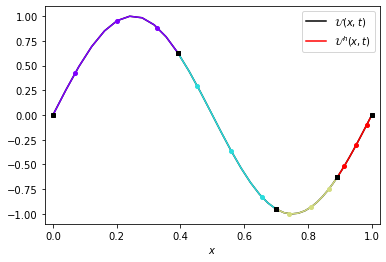

In [7]:
solver1.run()
solver1.post_process()
solver1.plot(plot_numerical=True, plot_exact=True, plot_nodes=True)

dt =  0.002777777777777778


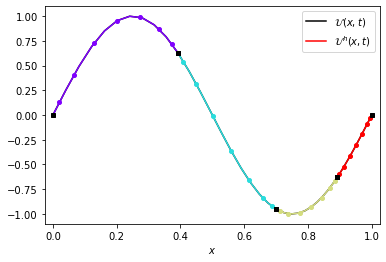

In [8]:
solver2.run()
solver2.post_process()
solver2.plot(plot_numerical=True, plot_exact=True, plot_nodes=True)

In [9]:
solver1.u_hat[0]

array([[ 1.02860599,  0.27634326, -0.27542161, -0.01210707,  0.01065472]])

In [10]:
solver2.u_hat[0]

array([[ 1.02846886,  0.27625288, -0.27530455, -0.01201231,  0.01066256]])